# Clustering Assignment  
**Name:** Palak Khandelia  
**Course:** Data Science with Generative AI  
**Topic:** Machine Learning – Clustering  


## Theory Questions and Answers

### Q1. What is unsupervised learning in the context of machine learning?  
**Answer:**  
Unsupervised learning is a type of machine learning where models are trained on unlabeled data.  
The goal is to uncover hidden patterns, structures, or groupings without predefined target values.  
Examples include clustering, dimensionality reduction, and association rule learning.


### Q2. How does K-Means clustering algorithm work?  
**Answer:**  
K-Means partitions data into *k* clusters by:  
1. Randomly selecting *k* initial centroids.  
2. Assigning each data point to its nearest centroid.  
3. Updating centroids as the mean of assigned points.  
4. Repeating steps 2–3 until centroids stop changing

### Q3. Explain the concept of a dendrogram in hierarchical clustering.  
**Answer:**  
A dendrogram is a tree-like diagram that shows the order and distances at which clusters are merged or split.  
The height of each merge represents the dissimilarity between combined clusters.


### Q4. What is the main difference between K-Means and Hierarchical Clustering?  
**Answer:**  
- **K-Means:** flat clustering, requires specifying *k*, iterative centroid updates.  
- **Hierarchical:** builds a tree (dendrogram) and can reveal nested cluster structures; no need to predefine *k*.


### Q5. What are the advantages of DBSCAN over K-Means?  
**Answer:**  
- Finds clusters of arbitrary shapes.  
- No need to pre-specify number of clusters.  
- Identifies outliers (noise points).  
- Handles varying densities better.


### Q6. When would you use Silhouette Score in clustering?  
**Answer:**  
Silhouette Score measures how similar a sample is to its own cluster versus others.  
It helps compare different *k* values or algorithms to find the best clustering performance.


### Q7. What are the limitations of Hierarchical Clustering?  
**Answer:**  
- Computationally expensive for large datasets.  
- Sensitive to noise and outliers.  
- Once merged/split, clusters can’t be corrected.  
- Choice of linkage method affects results.

### Q8. Why is feature scaling important in clustering algorithms like K-Means?  
**Answer:**  
Because K-Means uses distance metrics, features with larger numeric ranges dominate the computation.  
Scaling (standardization/normalization) ensures all features contribute equally.

### Q9. How does DBSCAN identify noise points?  
**Answer:**  
DBSCAN labels points as noise if they are not within `eps` distance of any core point  
and have fewer than `min_samples` neighbors in that radius.


### Q10. Define inertia in the context of K-Means.  
**Answer:**  
Inertia is the sum of squared distances of samples to their nearest cluster center.  
Lower inertia indicates tighter, more compact clusters.

### Q11. What is the elbow method in K-Means clustering?  
**Answer:**  
It’s a visual technique to choose optimal *k*.  
Plot inertia versus *k*; the “elbow” point where inertia reduction slows marks a suitable cluster count.

---


### Q12. Describe the concept of "density" in DBSCAN.  
**Answer:**  
Density refers to how closely points are packed.  
A point is a core point if it has at least `min_samples` neighbors within radius `eps`; dense regions form clusters.

### Q13. Can hierarchical clustering be used on categorical data?  
**Answer:**  
Yes, with appropriate distance measures (e.g., Hamming or Jaccard) or by encoding categorical variables numerically.


### Q14. What does a negative Silhouette Score indicate?  
**Answer:**  
It means a point is closer to another cluster than its own, implying incorrect assignment or poor clustering.


### Q15. Explain the term "linkage criteria" in hierarchical clustering.  
**Answer:**  
Linkage criteria define how distances between clusters are computed when merging:  
- **Single:** minimum distance  
- **Complete:** maximum distance  
- **Average:** mean distance  
- **Ward:** minimizes total variance within clusters.

### Q16. Why might K-Means perform poorly on data with varying cluster sizes or densities?  
**Answer:**  
K-Means assumes spherical, equally-sized clusters.  
When real clusters differ in size, shape, or density, it may misclassify boundary points.


### Q17. What are the core parameters in DBSCAN, and how do they influence clustering?  
**Answer:**  
- **eps:** neighborhood radius — larger `eps` merges clusters.  
- **min_samples:** minimum points to form a dense region — higher values make clusters denser but fewer.  


### Q18. How does K-Means++ improve upon standard K-Means initialization?  
**Answer:**  
K-Means++ picks initial centroids probabilistically to be far apart.  
This reduces chances of poor clustering and speeds convergence.


### Q19. What is agglomerative clustering?  
**Answer:**  
Agglomerative clustering is a bottom-up hierarchical method where each sample starts as its own cluster,  
and the closest clusters are merged iteratively until one cluster or a stopping criterion is reached.


### Q20. What makes Silhouette Score a better metric than just inertia for model evaluation?  
**Answer:**  
Inertia measures compactness only.  
Silhouette Score considers both **cohesion** (within-cluster similarity) and **separation** (between-cluster difference),  
giving a normalized score from −1 to 1 that’s more interpretable across models.

## Conclusion
This section covered the theoretical understanding of major clustering algorithms:  
K-Means, Hierarchical, and DBSCAN — along with evaluation metrics such as Inertia and Silhouette Score.


# Practical Questions

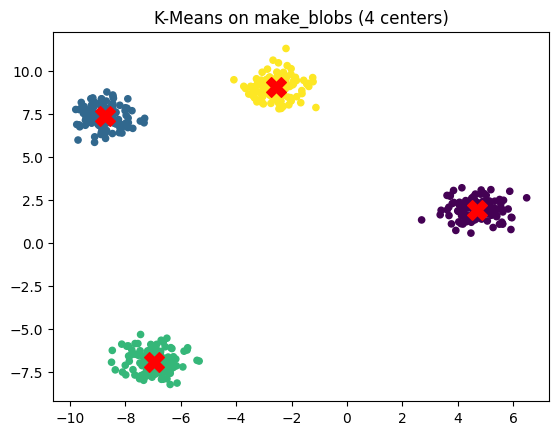

In [4]:
## Q21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, s=20)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X', s=200, color='red')
plt.title("K-Means on make_blobs (4 centers)")
plt.show()

In [5]:
## Q22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(iris.data)
print("First 10 predicted labels:", labels[:10])

First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


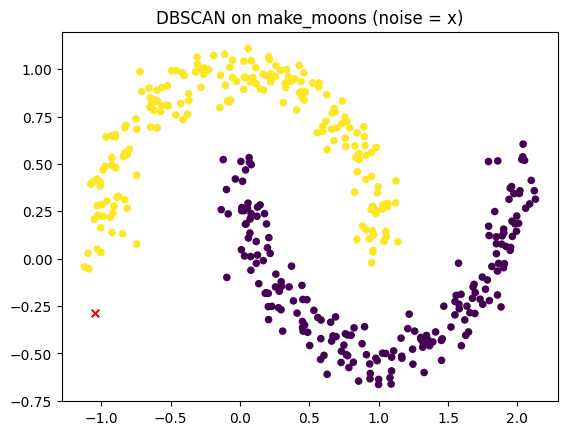

In [6]:
## Q23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=400, noise=0.08, random_state=42)
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_
noise = labels == -1
plt.scatter(X[~noise,0], X[~noise,1], c=labels[~noise], s=20)
plt.scatter(X[noise,0], X[noise,1], color='red', marker='x', s=30)
plt.title("DBSCAN on make_moons (noise = x)")
plt.show()

In [7]:
## Q24. Load the Wine dataset and apply K-Means after standardizing the features. Print cluster sizes.
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))

Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


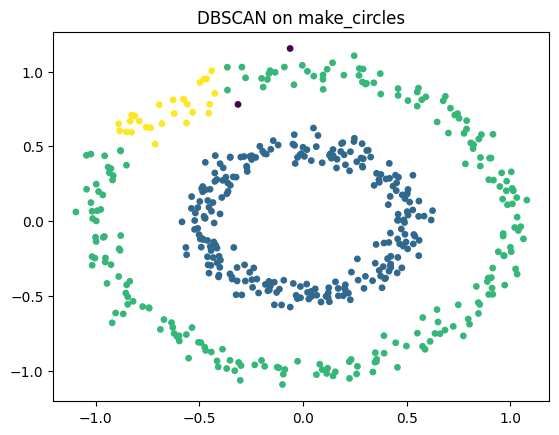

In [8]:
## Q25. Use make_circles to generate synthetic data and cluster using DBSCAN. Plot result.
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)
db = DBSCAN(eps=0.12, min_samples=5).fit(X)
plt.scatter(X[:,0], X[:,1], c=db.labels_, s=15)
plt.title("DBSCAN on make_circles")
plt.show()

In [9]:
## Q26. Load Breast Cancer dataset, apply MinMaxScaler, use K-Means (2 clusters). Output centroids.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

cancer = load_breast_cancer()
X = MinMaxScaler().fit_transform(cancer.data)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
print("Cluster centroids:\n", kmeans.cluster_centers_)

Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


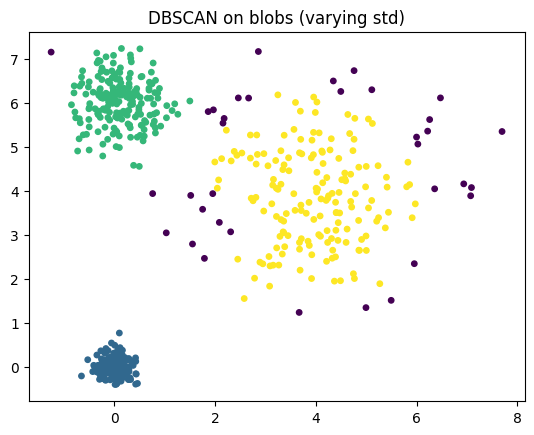

In [10]:
## Q27. Generate synthetic data with varying standard deviations and cluster with DBSCAN.
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=600, centers=[[0,0],[4,4],[0,6]],
                  cluster_std=[0.2,1.2,0.5], random_state=42)
db = DBSCAN(eps=0.6, min_samples=8).fit(X)
plt.scatter(X[:,0], X[:,1], c=db.labels_, s=15)
plt.title("DBSCAN on blobs (varying std)")
plt.show()

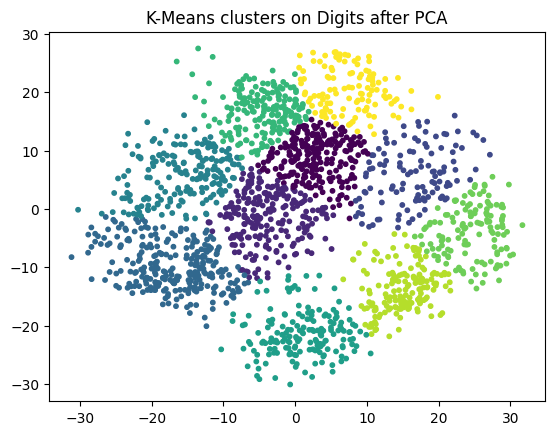

In [11]:
## Q28. Load Digits dataset, reduce to 2D using PCA, visualize clusters from K-Means.
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X2 = PCA(n_components=2, random_state=42).fit_transform(digits.data)
labels = KMeans(n_clusters=10, random_state=42).fit_predict(X2)
plt.scatter(X2[:,0], X2[:,1], c=labels, s=10)
plt.title("K-Means clusters on Digits after PCA")
plt.show()

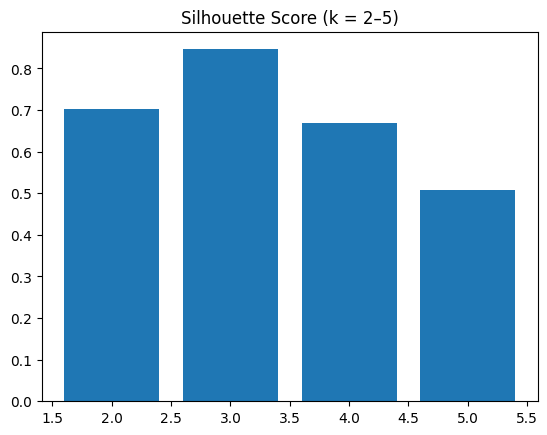

In [12]:
## Q29. Create synthetic data and evaluate Silhouette Scores for k = 2–5.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=3, random_state=42)
scores = [silhouette_score(X, KMeans(n_clusters=k, random_state=42).fit_predict(X)) for k in range(2,6)]
plt.bar([2,3,4,5], scores)
plt.title("Silhouette Score (k = 2–5)")
plt.show()

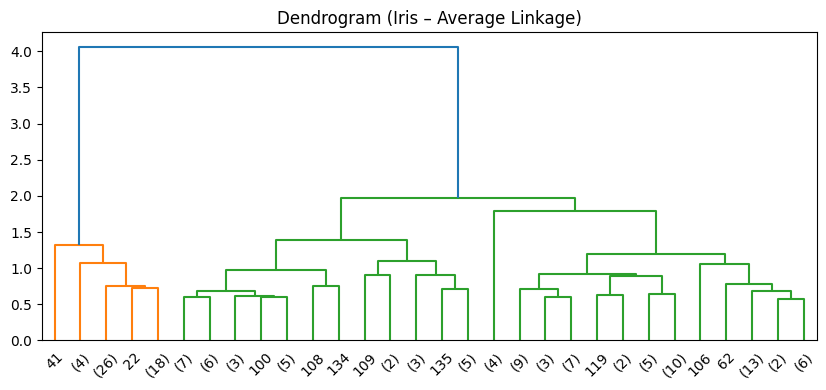

In [13]:
## Q30. Load Iris dataset and plot a dendrogram with average linkage.
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(load_iris().data, method='average')
plt.figure(figsize=(10,4))
dendrogram(Z, truncate_mode='lastp', p=30)
plt.title("Dendrogram (Iris – Average Linkage)")
plt.show()

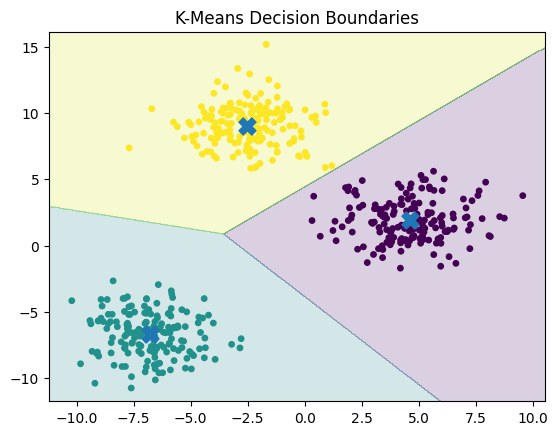

In [14]:
## Q31. Generate overlapping clusters with make_blobs, apply K-Means and visualize decision boundaries.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np, matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.6, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
h = 0.05
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, s=15)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X', s=150)
plt.title("K-Means Decision Boundaries")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


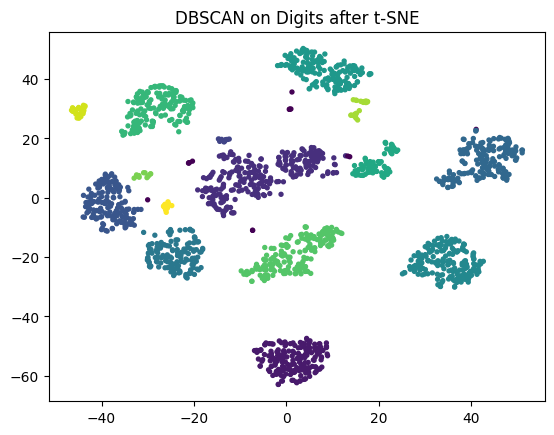

In [15]:
## Q32. Load Digits dataset, apply DBSCAN after reducing dimensions with t-SNE. Visualize results.
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X_tsne = TSNE(n_components=2, random_state=42, init='pca', n_iter=1000).fit_transform(digits.data)
db = DBSCAN(eps=3, min_samples=5).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=db.labels_, s=8)
plt.title("DBSCAN on Digits after t-SNE")
plt.show()

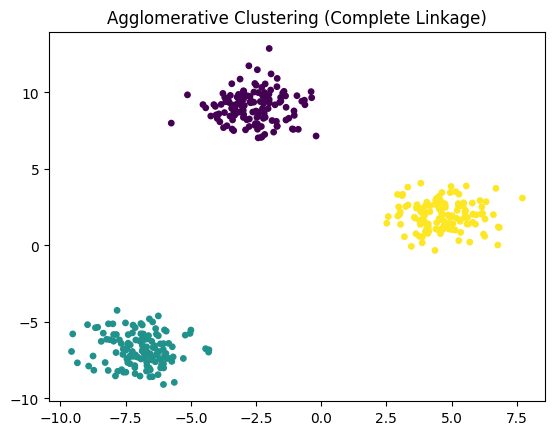

In [16]:
## Q33. Generate synthetic data and apply Agglomerative Clustering (complete linkage). Plot result.
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=3, random_state=42)
labels = AgglomerativeClustering(n_clusters=3, linkage='complete').fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=15)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()

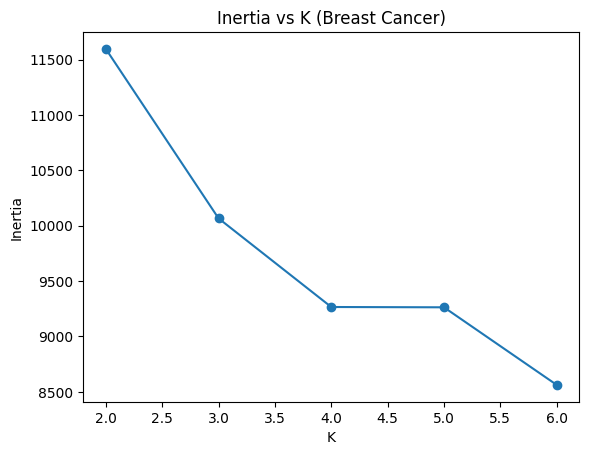

In [17]:
## Q34. Load Breast Cancer dataset and compare inertia for K = 2–6 using K-Means.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = StandardScaler().fit_transform(load_breast_cancer().data)
inertias = [KMeans(n_clusters=k, random_state=42).fit(X).inertia_ for k in range(2,7)]
plt.plot(range(2,7), inertias, marker='o')
plt.title("Inertia vs K (Breast Cancer)")
plt.xlabel("K"); plt.ylabel("Inertia")
plt.show()

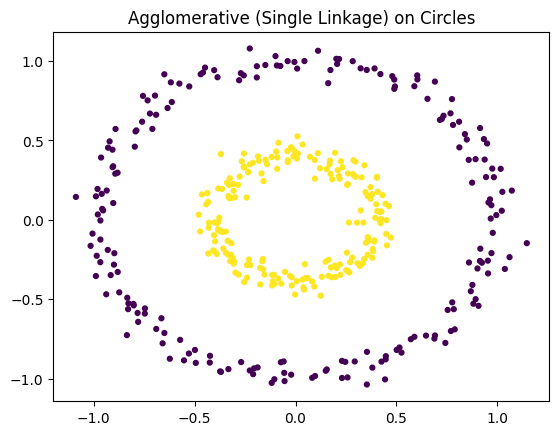

In [18]:
## Q35. Generate concentric circles and cluster using Agglomerative (single linkage).
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=400, noise=0.05, factor=0.4, random_state=42)
labels = AgglomerativeClustering(n_clusters=2, linkage='single').fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=12)
plt.title("Agglomerative (Single Linkage) on Circles")
plt.show()

In [19]:
## Q36. Use Wine dataset, apply DBSCAN after scaling, count clusters (excluding noise).
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X = StandardScaler().fit_transform(load_wine().data)
db = DBSCAN(eps=1.2, min_samples=5).fit(X)
n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print("Clusters (excluding noise):", n_clusters)

Clusters (excluding noise): 0


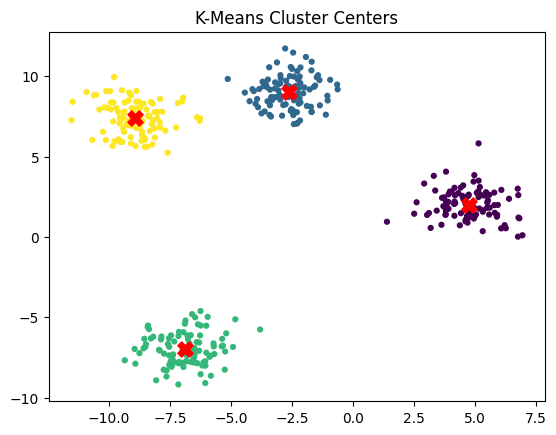

In [20]:
## Q37. Generate make_blobs data and apply K-Means. Plot cluster centers.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=4, random_state=42)
km = KMeans(n_clusters=4, random_state=42).fit(X)
plt.scatter(X[:,0], X[:,1], c=km.labels_, s=12)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='X', s=120, color='red')
plt.title("K-Means Cluster Centers")
plt.show()

In [21]:
## Q38. Load Iris dataset, cluster with DBSCAN, print how many samples were identified as noise.
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

iris = load_iris()
db = DBSCAN(eps=0.5, min_samples=5).fit(iris.data)
print("Noise samples:", (db.labels_ == -1).sum())

Noise samples: 17


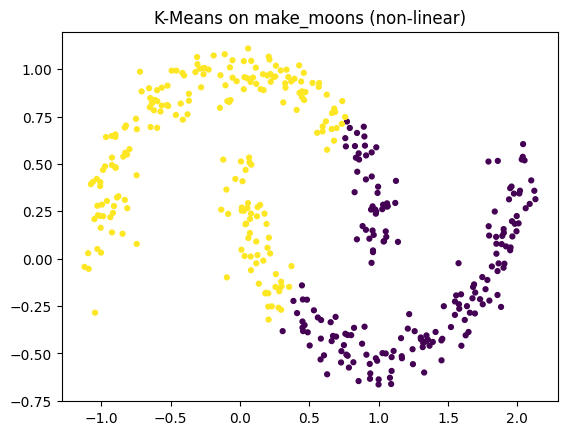

In [22]:
## Q39. Generate non-linearly separable make_moons data, apply K-Means, visualize result.
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=400, noise=0.08, random_state=42)
labels = KMeans(n_clusters=2, random_state=42).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=12)
plt.title("K-Means on make_moons (non-linear)")
plt.show()

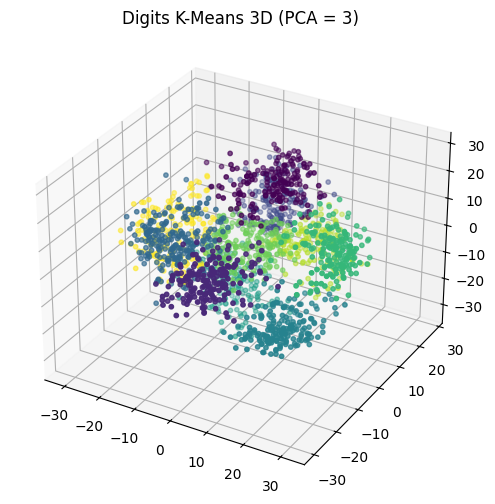

In [23]:
## Q40. Load Digits dataset, apply PCA (3 components), use K-Means, visualize 3D scatter.
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X3 = PCA(n_components=3, random_state=42).fit_transform(digits.data)
labels = KMeans(n_clusters=10, random_state=42).fit_predict(X3)
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=labels, s=10)
ax.set_title("Digits K-Means 3D (PCA = 3)")
plt.show()

In [24]:
## Q41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score for K=5:", score)

Silhouette Score for K=5: 0.678738720085253


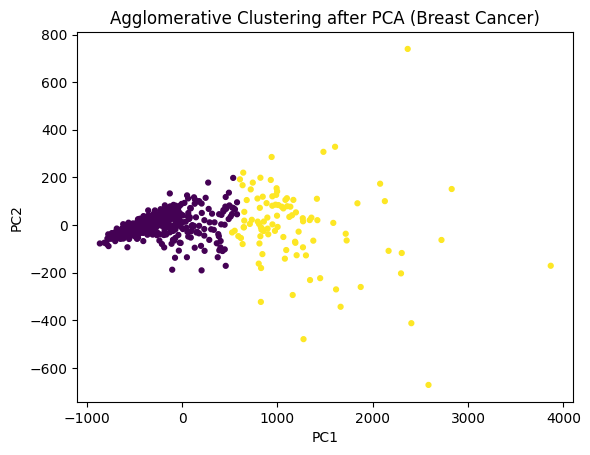

In [25]:
## Q42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X = load_breast_cancer().data
X_pca = PCA(n_components=2, random_state=42).fit_transform(X)
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=12)
plt.title("Agglomerative Clustering after PCA (Breast Cancer)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

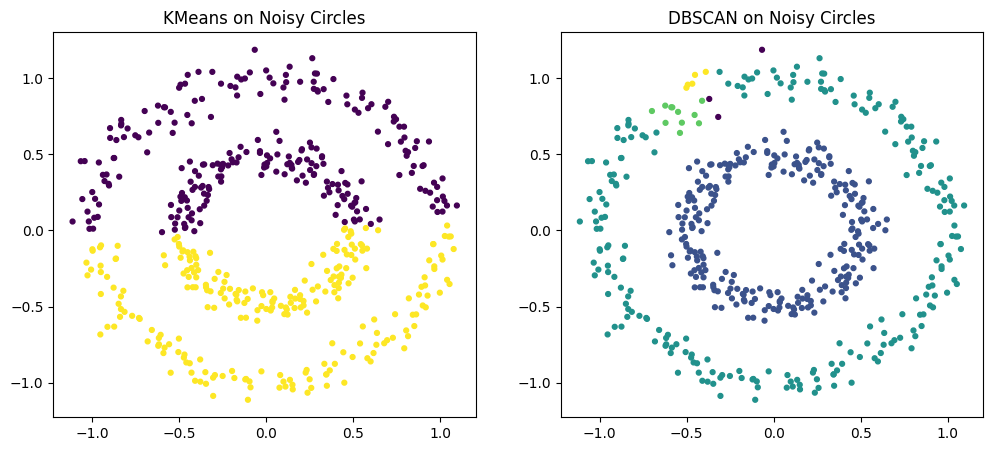

In [26]:
## Q43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, noise=0.06, factor=0.5, random_state=42)
labels_k = KMeans(n_clusters=2, random_state=42).fit_predict(X)
labels_d = DBSCAN(eps=0.12, min_samples=5).fit_predict(X)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=labels_k, s=12)
plt.title("KMeans on Noisy Circles")

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=labels_d, s=12)
plt.title("DBSCAN on Noisy Circles")
plt.show()

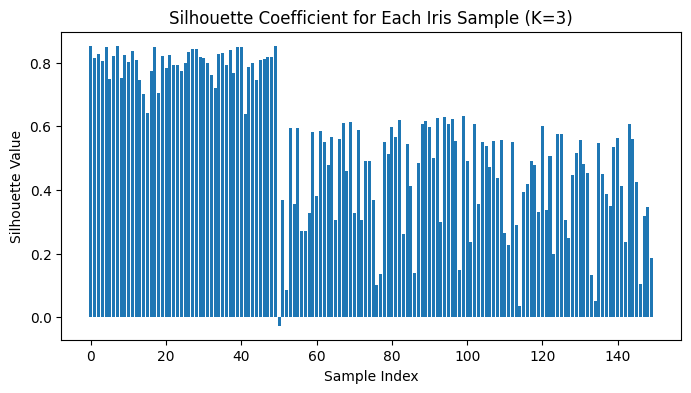

In [27]:
## Q44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

X = load_iris().data
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)
sil_vals = silhouette_samples(X, labels)

plt.figure(figsize=(8,4))
plt.bar(range(len(sil_vals)), sil_vals)
plt.title("Silhouette Coefficient for Each Iris Sample (K=3)")
plt.xlabel("Sample Index"); plt.ylabel("Silhouette Value")
plt.show()

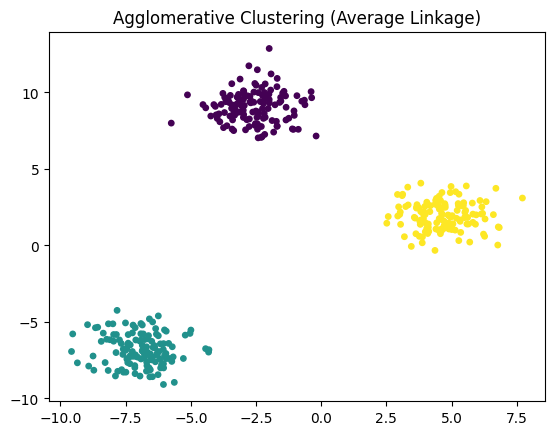

In [28]:
## Q45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=3, random_state=42)
labels = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=15)
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()

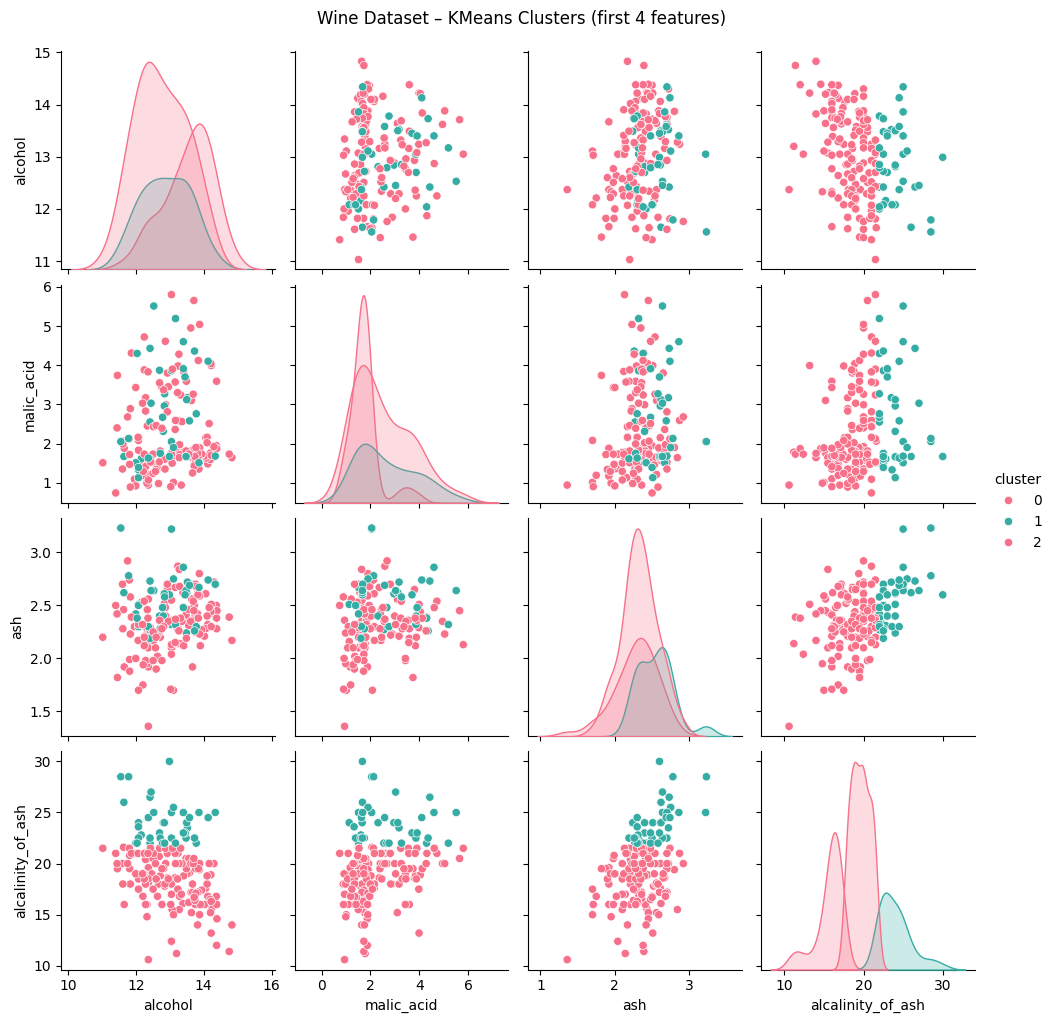

In [29]:
## Q46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

wine = load_wine()
df = pd.DataFrame(wine.data[:, :4], columns=wine.feature_names[:4])
df['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(df)
sns.pairplot(df, vars=wine.feature_names[:4], hue='cluster', diag_kind='kde', palette='husl')
plt.suptitle("Wine Dataset – KMeans Clusters (first 4 features)", y=1.02)
plt.show()

In [30]:
## Q47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.4, random_state=42)
db = DBSCAN(eps=0.8, min_samples=6).fit(X)
unique, counts = np.unique(db.labels_, return_counts=True)
print("Label counts (including -1 as noise):", dict(zip(unique, counts)))

Label counts (including -1 as noise): {np.int64(-1): np.int64(66), np.int64(0): np.int64(113), np.int64(1): np.int64(110), np.int64(2): np.int64(108), np.int64(3): np.int64(103)}


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


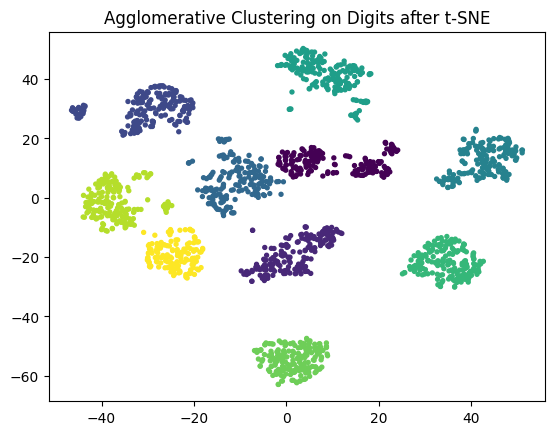

In [31]:

## Q48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
X_tsne = TSNE(n_components=2, random_state=42, init='pca', n_iter=1000).fit_transform(digits.data)
labels = AgglomerativeClustering(n_clusters=10).fit_predict(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, s=8)
plt.title("Agglomerative Clustering on Digits after t-SNE")
plt.show()